# L2 Error against Number of Iterations

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

In [16]:
def error_vs_iterations(func = "egg", seed_size = 2, metrics = "L2", batch = False, batch_size = 2, heuristic = "kb"):
    if batch == False:
        dir_name = func + "," + str(seed_size) + "_seed," + str(batch_size) + "_batch_size/"
        filename = "A_results_" + metrics + ",sequential.npy"
        results = np.load(dir_name + filename)
    else:
        dir_name = func + "," + str(seed_size) + "_seed," + str(batch_size) + "_batch_size/"
        filename = "A_results_" + metrics + "," + heuristic + "_heuristic.npy"
        results = np.load(dir_name + filename)
        results = np.repeat(results, repeats = batch_size * np.ones(results.shape[1], dtype = int), axis = 1)
    
    df = pd.DataFrame(results)
    df = df.stack()
    df = df.to_frame()
    df.index.names = (['seed', 'iters'])
    df.columns = ['values']
    df.reset_index(inplace = True)
    return df
    
    #return results, seed_size, num_iterations


[Text(0,0.5,'Error'),
 Text(0.5,0,'No of Iterations'),
 Text(0.5,1,'Comparison of Sequential with 4-Batch on Egg Function')]

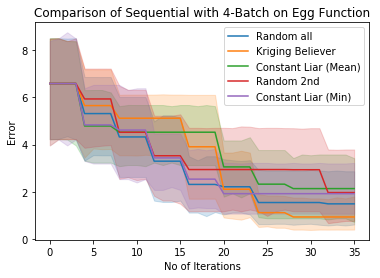

In [15]:
seed_size = 5
func = 'egg'
batch_size = 4
#results1 = error_vs_iterations(batch = False)    
results2 = error_vs_iterations(func = func, batch = True, batch_size = batch_size, seed_size = seed_size, heuristic = "random")
results3 = error_vs_iterations(func = func, batch = True, batch_size = batch_size, seed_size = seed_size, heuristic = "kb")
results4 = error_vs_iterations(func = func, batch = True, batch_size = batch_size, seed_size = seed_size, heuristic = "cl-mean")
results5 = error_vs_iterations(func = func, batch = True, batch_size = batch_size, seed_size = seed_size, heuristic = "random_except_1st")
results6 = error_vs_iterations(func = func, batch = True, batch_size = batch_size, seed_size = seed_size, heuristic = "cl-min")

#fig = sns.lineplot(x = 'iters', y = 'values', data = results1, err_style = "band", label = 'Sequential')
fig = sns.lineplot(x = 'iters', y = 'values', data = results2, err_style = "band", label = 'Random all')
fig = sns.lineplot(x = 'iters', y = 'values', data = results3, err_style = "band", label = 'Kriging Believer') 
fig = sns.lineplot(x = 'iters', y = 'values', data = results4, err_style = "band", label = 'Constant Liar (Mean)') 
fig = sns.lineplot(x = 'iters', y = 'values', data = results5, err_style = "band", label = 'Random 2nd')
fig = sns.lineplot(x = 'iters', y = 'values', data = results6, err_style = "band", label = 'Constant Liar (Min)') 
fig.set(xlabel = "No of Iterations", ylabel = "Error", title = 'Comparison of Sequential with 4-Batch on Egg Function')

In [14]:
#print(results1.shape)
print(results2.shape)
print(results3.shape)
print(results4.shape)
print(results5.shape)

(180, 3)
(180, 3)
(180, 3)
(180, 3)


[Text(0,0.5,'Error'),
 Text(0.5,0,'No of Iterations'),
 Text(0.5,1,'Comparison of Sequential with 2-Batch on Egg Function')]

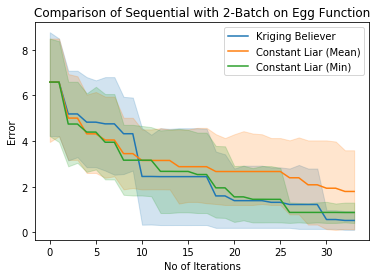

In [19]:
seed_size = 5
func = 'egg'
batch_size = 2
#results1 = error_vs_iterations(batch = False)    
#results2 = error_vs_iterations(func = func, batch = True, batch_size = batch_size, seed_size = seed_size, heuristic = "random")
results3 = error_vs_iterations(func = func, batch = True, batch_size = batch_size, seed_size = seed_size, heuristic = "kb")
results4 = error_vs_iterations(func = func, batch = True, batch_size = batch_size, seed_size = seed_size, heuristic = "cl-mean")
#results5 = error_vs_iterations(func = func, batch = True, batch_size = batch_size, seed_size = seed_size, heuristic = "random_except_1st")
results6 = error_vs_iterations(func = func, batch = True, batch_size = batch_size, seed_size = seed_size, heuristic = "cl-min")

#fig = sns.lineplot(x = 'iters', y = 'values', data = results1, err_style = "band", label = 'Sequential')
#fig = sns.lineplot(x = 'iters', y = 'values', data = results2, err_style = "band", label = 'Random all')
fig = sns.lineplot(x = 'iters', y = 'values', data = results3, err_style = "band", label = 'Kriging Believer') 
fig = sns.lineplot(x = 'iters', y = 'values', data = results4, err_style = "band", label = 'Constant Liar (Mean)') 
#fig = sns.lineplot(x = 'iters', y = 'values', data = results5, err_style = "band", label = 'Random 2nd')
fig = sns.lineplot(x = 'iters', y = 'values', data = results6, err_style = "band", label = 'Constant Liar (Min)') 
fig.set(xlabel = "No of Iterations", ylabel = "Error", title = 'Comparison of Sequential with 2-Batch on Egg Function')

Plotting distance between queries

In [34]:
import pickle
import GPy
path = "C:/Users/jianhong/Desktop/4yp-bo/FITBO_GPy-FITBOMM_only/Exp_Data/egg,1_seed,2_batch_size/0_seed/cl-max_heuristic,intermediate_vars.pickle"
with open(path, 'rb') as f:  # Python 3: open(..., 'rb')
    obj0, obj1 = pickle.load(f)


In [35]:
obj0

array([[[ 0.82203241,  0.68681885],
        [ 0.58666697,  1.        ]]])

In [11]:
kwargs = {
    "metrics" : "L2",
    "func" : "egg",
    "seed_size" : 5,
    "batch" : True,
    "batch_size" : 4,
    "heuristic" : "kb",
    aggr_seed = "mean" # Whether to take mean or median among seed runs
}

In [133]:
import pickle
def query_distances(func = "egg", seed_size = 5, metrics = "L2", batch = True, batch_size = 2, heuristic = "kb", aggr_seed = "mean"):
    distances = np.array([])
    for i in range(seed_size):
        dir_name = func + ',' + str(seed_size) + '_seed,' + str(batch_size) + '_batch_size/' \
        + str(i) + "_seed/"
        file_name = dir_name + heuristic + ',intermediate_vars.pickle'
        
        with open(file_name, 'rb') as f:  # Python 3: open(..., 'rb')
            X, Y = pickle.load(f)
            
        if batch == True: # if batch, X is shape (num_batches, batch_size, X_dim)
            X = X.reshape(-1, X.shape[-1])
            if i == 0: print(X)
        
        l2_norm = np.linalg.norm(X, axis = 1)
        distance = np.diff(l2_norm)
        
        if distances.shape == (0,):
            distances = distance
        else: 
            distances = np.vstack((distances, distance))
            
    if aggr_seed == "mean":
        return np.mean(distances, axis = 0)

    if aggr_seed == "median":
        return np.median(distances, axis = 0)
                      

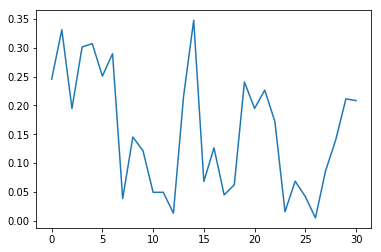

In [135]:
x = [i for i in range(31)]
import matplotlib.pyplot as plt
plt.plot(x,abs(a))

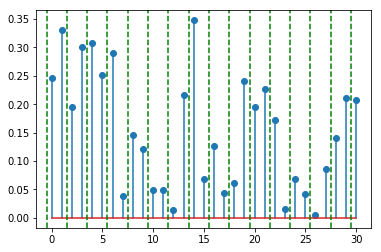

In [142]:
plt.stem(x,abs(a))
xposition = [i*2-0.5 for i in range(16)]
for xc in xposition:
    plt.axvline(x=xc, color='g', linestyle='--')

In [97]:
c = np.array_split(b,5)
c

[array([ 0.82203241,  0.68681885]),
 array([ 1.,  0.]),
 array([ 0.42259427,  0.96803208]),
 array([ 0.43860642,  0.        ]),
 array([ 0.,  1.])]

In [76]:
b = np.array([[[1,1],[2,2]],[[3,3],[4,4]],[[5,5],[6,6]]])
b

array([[[1, 1],
        [2, 2]],

       [[3, 3],
        [4, 4]],

       [[5, 5],
        [6, 6]]])

In [78]:
c = np.reshape(b, (6,2), order = 'F')
c

array([[1, 1],
       [3, 3],
       [5, 5],
       [2, 2],
       [4, 4],
       [6, 6]])